In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('E:\machine\MachineLearning\DataSets\Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = data.iloc[:,2:4].values

In [5]:
y = data.iloc[:,4].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [12]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
X_train

array([[ 2.09125996, -0.74737904],
       [-0.05272574, -1.13451598],
       [ 2.09125996,  0.9202878 ],
       [-1.0781102 , -0.56870045],
       [-0.98489343, -0.41980162],
       [ 1.0658755 , -0.1815635 ],
       [-0.98489343,  0.56293062],
       [-0.1459425 , -0.24112303],
       [ 1.25230904,  2.23059745],
       [-0.89167666,  1.54566286],
       [-0.23915927,  0.02689485],
       [-0.05272574,  0.65226991],
       [ 0.97265873, -1.13451598],
       [-0.79845989,  2.29015698],
       [ 0.32014134, -0.36024209],
       [ 1.0658755 , -1.2834148 ],
       [ 1.43874258,  0.02689485],
       [-0.70524312,  0.47359132],
       [-1.26454374, -0.47936115],
       [-1.35776051, -0.24112303],
       [-0.51880958,  1.90302004],
       [ 0.41335811, -0.03266468],
       [ 1.43874258, -1.10473622],
       [-0.1459425 , -0.62825998],
       [ 1.34552581,  1.99235933],
       [ 0.04049103, -0.00288491],
       [ 0.22692457,  0.11623414],
       [ 1.90482642, -1.43231363],
       [ 0.1337078 ,

In [14]:
from sklearn.svm import SVC

In [15]:
classifier = SVC(kernel='linear')

In [16]:
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
y_predictor = classifier.predict(X_test)

In [18]:
y_predictor

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
cm = confusion_matrix(y_test,y_predictor)

In [21]:
cm

array([[50,  4],
       [ 8, 18]], dtype=int64)

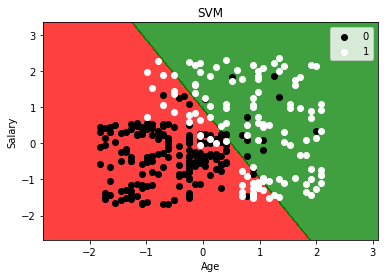

In [23]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_point, y_point = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_point[:, 0].min() - 1, stop = X_point[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_point[:, 1].min() - 1, stop = X_point[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_point)):
    plt.scatter(X_point[y_point == j, 0], X_point[y_point == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
plt.title('SVM')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
